<a href="https://colab.research.google.com/github/ArthurTerozendi/classificador-pefil-voto-candidato/blob/main/classificador_pefil_voto_candidato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clonando repositório

In [ ]:
!git clone https://github.com/ArthurTerozendi/classificador-pefil-voto-candidato.git

Cloning into 'classificador-pefil-voto-candidato'...
remote: Enumerating objects: 31, done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 31
Unpacking objects: 100% (31/31), 69.53 MiB | 14.51 MiB/s, done.


# Imports

In [ ]:
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [ ]:
def calculate_age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
bem_candidatos = pd.read_csv('classificador-pefil-voto-candidato/database/bem_candidato_2022_MG.csv', ',', encoding='latin1', usecols=['SQ_CANDIDATO', 'VR_BEM_CANDIDATO'])
consulta_cand = pd.read_csv('classificador-pefil-voto-candidato/database/consulta_cand_2022_MG.csv', ',', encoding='latin1', usecols=['DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'DT_NASCIMENTO', 'DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA'])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(len(bem_candidatos), len(consulta_cand))

8548 2562


- Somatório do valor dos bens de cada canditado

In [ ]:
bem_candidatos['VR_BEM_CANDIDATO'] = bem_candidatos['VR_BEM_CANDIDATO'].apply(lambda x: x.replace(',', '.'))
bem_candidatos['VR_BEM_CANDIDATO'] = pd.to_numeric(bem_candidatos['VR_BEM_CANDIDATO'], downcast='float')
bem_candidatos_sum = bem_candidatos.groupby(['SQ_CANDIDATO']).sum()
bem_candidatos_sum

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
130001595976,2.195987e+07
130001595978,5.700000e+05
130001595979,3.332248e+05
130001595983,9.090000e+05
130001595984,2.073415e+06
...,...
130001737057,5.000000e+05
130001737059,1.500000e+04
130001737060,1.360000e+04


- Pegando apenas os Deputados

In [ ]:
dEstadual = consulta_cand.query("DS_CARGO == 'DEPUTADO ESTADUAL'", inplace=False)
dFederal = consulta_cand.query("DS_CARGO == 'DEPUTADO FEDERAL'", inplace=False)
deputados = pd.concat([dEstadual, dFederal])
deputados

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,DT_NASCIMENTO,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA
3,DEPUTADO ESTADUAL,130001607719,44357,JARDEL MOIA MONTEIRO,24/01/1984,MASCULINO,CASADO(A),PARDA
5,DEPUTADO ESTADUAL,130001615626,11323,REINALDO LUCIO DA SILVA,30/08/1972,MASCULINO,CASADO(A),PARDA
6,DEPUTADO ESTADUAL,130001634278,19151,ELIES GOMES COSTA,23/02/1997,MASCULINO,CASADO(A),PARDA
9,DEPUTADO ESTADUAL,130001669318,35888,JOSE GONZAGA DE SOUZA,19/05/1961,MASCULINO,CASADO(A),PRETA
13,DEPUTADO ESTADUAL,130001607418,43456,SILVIA DA CRUZ MESSIAS,13/08/1964,FEMININO,CASADO(A),BRANCA
...,...,...,...,...,...,...,...,...
2549,DEPUTADO FEDERAL,130001607279,1360,DINEY LENON DE PAULO,16/06/1981,MASCULINO,SOLTEIRO(A),BRANCA
2551,DEPUTADO FEDERAL,130001606187,3377,ANGELITA MOREIRA ROCHA,20/09/1966,FEMININO,SOLTEIRO(A),BRANCA
2552,DEPUTADO FEDERAL,130001606191,3337,ERICK SANTOS NAZARETH,20/12/1980,MASCULINO,CASADO(A),PARDA
2553,DEPUTADO FEDERAL,130001607565,9034,RICARDO GONï¿½ALVES CAMPOS,13/11/1970,MASCULINO,CASADO(A),BRANCA


- Junção das duas tabelas

In [ ]:
registroCand = pd.merge(deputados, bem_candidatos_sum, how='left', left_on='SQ_CANDIDATO', right_on='SQ_CANDIDATO')
registroCand['IDADE'] = registroCand['DT_NASCIMENTO'].apply(calculate_age)
registroCand

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,DT_NASCIMENTO,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA,VR_BEM_CANDIDATO,IDADE
0,DEPUTADO ESTADUAL,130001607719,44357,JARDEL MOIA MONTEIRO,24/01/1984,MASCULINO,CASADO(A),PARDA,3.490000e+04,39
1,DEPUTADO ESTADUAL,130001615626,11323,REINALDO LUCIO DA SILVA,30/08/1972,MASCULINO,CASADO(A),PARDA,2.200000e+04,50
2,DEPUTADO ESTADUAL,130001634278,19151,ELIES GOMES COSTA,23/02/1997,MASCULINO,CASADO(A),PARDA,6.800000e+05,25
3,DEPUTADO ESTADUAL,130001669318,35888,JOSE GONZAGA DE SOUZA,19/05/1961,MASCULINO,CASADO(A),PRETA,NaN,61
4,DEPUTADO ESTADUAL,130001607418,43456,SILVIA DA CRUZ MESSIAS,13/08/1964,FEMININO,CASADO(A),BRANCA,1.592013e+05,58
...,...,...,...,...,...,...,...,...,...,...
2509,DEPUTADO FEDERAL,130001607279,1360,DINEY LENON DE PAULO,16/06/1981,MASCULINO,SOLTEIRO(A),BRANCA,NaN,41
2510,DEPUTADO FEDERAL,130001606187,3377,ANGELITA MOREIRA ROCHA,20/09/1966,FEMININO,SOLTEIRO(A),BRANCA,NaN,56
2511,DEPUTADO FEDERAL,130001606191,3337,ERICK SANTOS NAZARETH,20/12/1980,MASCULINO,CASADO(A),PARDA,4.500000e+04,42
2512,DEPUTADO FEDERAL,130001607565,9034,RICARDO GONï¿½ALVES CAMPOS,13/11/1970,MASCULINO,CASADO(A),BRANCA,2.537668e+06,52


In [ ]:
registroCand["NaN"] = registroCand['VR_BEM_CANDIDATO'].isnull().values
registroCand["Menor10K"] = np.where(registroCand['VR_BEM_CANDIDATO'] <= 10000, True, False)
registroCand["10kA100K"] = np.where((registroCand['VR_BEM_CANDIDATO'] > 10000) & (registroCand["VR_BEM_CANDIDATO"] <= 100000), True, False)
registroCand["100kA1000K"] = np.where((registroCand['VR_BEM_CANDIDATO'] >= 100000) & (registroCand["VR_BEM_CANDIDATO"] <= 1000000), True, False)
registroCand["Maior10000K"] = np.where(registroCand['VR_BEM_CANDIDATO'] >= 1000000, True, False)

In [ ]:
registroCand 

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,DT_NASCIMENTO,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA,VR_BEM_CANDIDATO,IDADE,NaN,Menor10K,10kA100K,100kA1000K,Maior10000K
0,DEPUTADO ESTADUAL,130001607719,44357,JARDEL MOIA MONTEIRO,24/01/1984,MASCULINO,CASADO(A),PARDA,3.490000e+04,39,False,False,True,False,False
1,DEPUTADO ESTADUAL,130001615626,11323,REINALDO LUCIO DA SILVA,30/08/1972,MASCULINO,CASADO(A),PARDA,2.200000e+04,50,False,False,True,False,False
2,DEPUTADO ESTADUAL,130001634278,19151,ELIES GOMES COSTA,23/02/1997,MASCULINO,CASADO(A),PARDA,6.800000e+05,25,False,False,False,True,False
3,DEPUTADO ESTADUAL,130001669318,35888,JOSE GONZAGA DE SOUZA,19/05/1961,MASCULINO,CASADO(A),PRETA,NaN,61,True,False,False,False,False
4,DEPUTADO ESTADUAL,130001607418,43456,SILVIA DA CRUZ MESSIAS,13/08/1964,FEMININO,CASADO(A),BRANCA,1.592013e+05,58,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,DEPUTADO FEDERAL,130001607279,1360,DINEY LENON DE PAULO,16/06/1981,MASCULINO,SOLTEIRO(A),BRANCA,NaN,41,True,False,False,False,False
2510,DEPUTADO FEDERAL,130001606187,3377,ANGELITA MOREIRA ROCHA,20/09/1966,FEMININO,SOLTEIRO(A),BRANCA,NaN,56,True,False,False,False,False
2511,DEPUTADO FEDERAL,130001606191,3337,ERICK SANTOS NAZARETH,20/12/1980,MASCULINO,CASADO(A),PARDA,4.500000e+04,42,False,False,True,False,False
2512,DEPUTADO FEDERAL,130001607565,9034,RICARDO GONï¿½ALVES CAMPOS,13/11/1970,MASCULINO,CASADO(A),BRANCA,2.537668e+06,52,False,False,False,False,True


In [ ]:
registroCand.drop(columns=["VR_BEM_CANDIDATO"])

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,DT_NASCIMENTO,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA,IDADE,NaN,Menor10K,10kA100K,100kA1000K,Maior10000K
0,DEPUTADO ESTADUAL,130001607719,44357,JARDEL MOIA MONTEIRO,24/01/1984,MASCULINO,CASADO(A),PARDA,39,False,False,True,False,False
1,DEPUTADO ESTADUAL,130001615626,11323,REINALDO LUCIO DA SILVA,30/08/1972,MASCULINO,CASADO(A),PARDA,50,False,False,True,False,False
2,DEPUTADO ESTADUAL,130001634278,19151,ELIES GOMES COSTA,23/02/1997,MASCULINO,CASADO(A),PARDA,25,False,False,False,True,False
3,DEPUTADO ESTADUAL,130001669318,35888,JOSE GONZAGA DE SOUZA,19/05/1961,MASCULINO,CASADO(A),PRETA,61,True,False,False,False,False
4,DEPUTADO ESTADUAL,130001607418,43456,SILVIA DA CRUZ MESSIAS,13/08/1964,FEMININO,CASADO(A),BRANCA,58,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,DEPUTADO FEDERAL,130001607279,1360,DINEY LENON DE PAULO,16/06/1981,MASCULINO,SOLTEIRO(A),BRANCA,41,True,False,False,False,False
2510,DEPUTADO FEDERAL,130001606187,3377,ANGELITA MOREIRA ROCHA,20/09/1966,FEMININO,SOLTEIRO(A),BRANCA,56,True,False,False,False,False
2511,DEPUTADO FEDERAL,130001606191,3337,ERICK SANTOS NAZARETH,20/12/1980,MASCULINO,CASADO(A),PARDA,42,False,False,True,False,False
2512,DEPUTADO FEDERAL,130001607565,9034,RICARDO GONï¿½ALVES CAMPOS,13/11/1970,MASCULINO,CASADO(A),BRANCA,52,False,False,False,False,True


- Quantidade de deputados estaduais e federais respectivamente

([<matplotlib.patches.Wedge at 0x7f82c81c5b50>,
 [Text(-0.631153739375505, 3.2390808815576553, 'DEPUTADO ESTADUAL'),
  Text(0.631153436110864, -3.239080940650519, 'DEPUTADO FEDERAL')],
 [Text(-0.3442656760230027, 1.766771389940539, '56.13'),
  Text(0.34426551060592575, -1.7667714221730102, '43.87')])

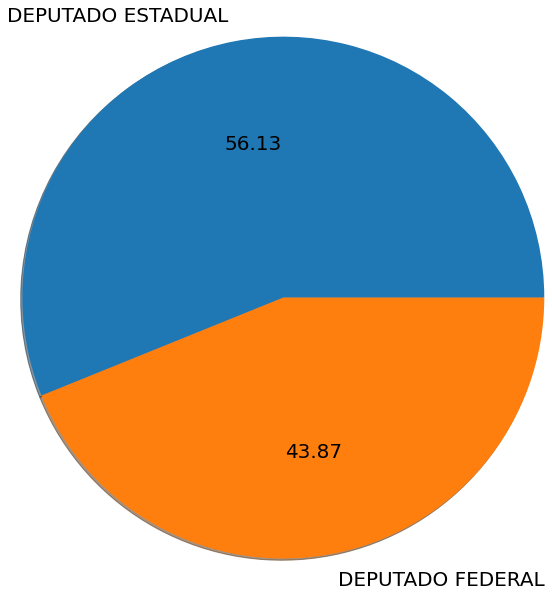

In [ ]:
from numpy.lib.shape_base import tile
num_cargos = registroCand['DS_CARGO'].value_counts()
plt.pie(x=num_cargos, labels=['DEPUTADO ESTADUAL', 'DEPUTADO FEDERAL'], autopct='%.2f', shadow=True, radius=3, textprops={'fontsize': 20}, )

([<matplotlib.patches.Wedge at 0x7f82c8106430>,
 [Text(-1.6392743945497714, 2.864049486194937, 'MASCULINO'),
  Text(1.639274394549771, -2.8640494861949373, 'FEMININO')],
 [Text(-0.8941496697544206, 1.5622088106517835, '66.55'),
  Text(0.8941496697544203, -1.5622088106517837, '33.45')])

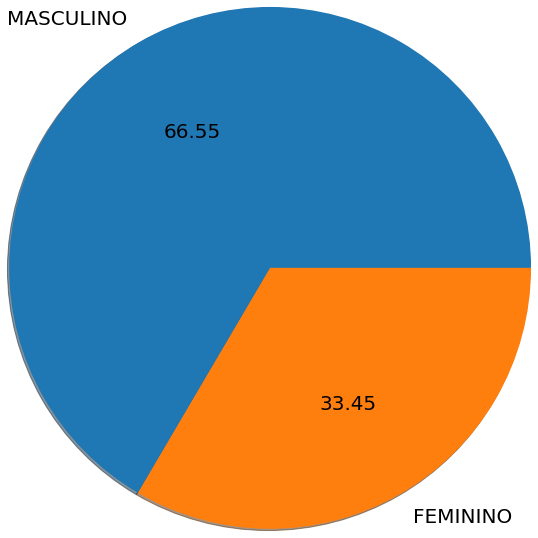

In [ ]:
num_genero = registroCand['DS_GENERO'].value_counts()
plt.pie(x=num_genero, labels=['MASCULINO', 'FEMININO'], autopct='%.2f', shadow=True, radius=3, textprops={'fontsize': 20}, )

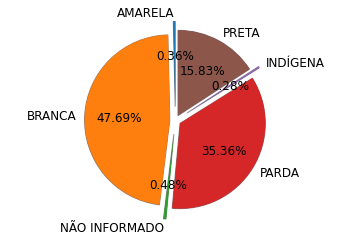

In [ ]:
num_cor_raca = registroCand['DS_COR_RACA'].value_counts()
num_cor_raca_labels = ['AMARELA', 'BRANCA', 'NÃO INFORMADO', 'PARDA', 'INDÍGENA', 'PRETA']
num_cor_raca_value = [num_cor_raca.AMARELA, num_cor_raca.BRANCA, num_cor_raca['Nï¿½O INFORMADO'], num_cor_raca.PARDA, num_cor_raca['INDï¿½GENA'], num_cor_raca.PRETA]
f, ax = plt.subplots()
explode = (2, 0.8, 2, 0.8, 2, 0.8)
ax.pie(num_cor_raca_value, explode=explode, labels=num_cor_raca_labels, autopct='%.2f%%',
        shadow=True, startangle=90, radius=12.4, textprops={'size': 'larger'})
ax.axis('equal')
plt.show()

([<matplotlib.patches.Wedge at 0x7f82c80410d0>,
 [Text(-0.35806516934099164, 3.280516626158875, 'CASADO(A)'),
  Text(-1.3188334975399036, -3.0250087943288144, 'SOLTEIRO(A)'),
  Text(2.6885355916439857, -1.91357685303296, 'DIVORCIADO(A)'),
  Text(3.2727022082881088, -0.4235802826692222, 'VIÚVO(A)'),
  Text(3.2985159749147486, -0.09895637034677872, 'SEPARADO(A) JUDICIALMENTE')],
 [Text(-0.19530827418599542, 1.7893727051775679, '53.46'),
  Text(-0.7193637259308564, -1.6500047969066256, '29.99'),
  Text(1.4664739590785374, -1.0437691925634325, '13.40'),
  Text(1.7851102954298772, -0.23104379054684843, '2.19'),
  Text(1.7991905317716805, -0.05397620200733384, '0.95')])

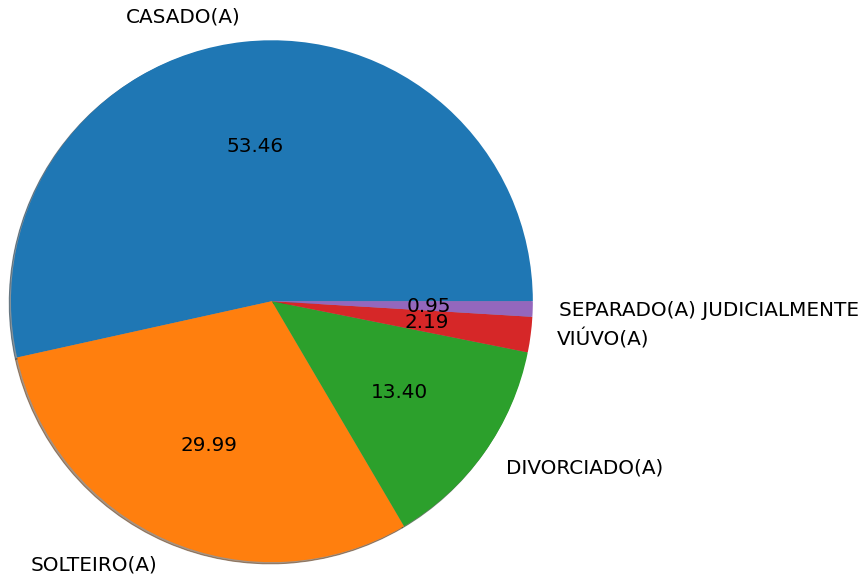

In [ ]:
num_estado_civil = registroCand['DS_ESTADO_CIVIL'].value_counts()
plt.pie(x=num_estado_civil, labels=['CASADO(A)', 'SOLTEIRO(A)', 'DIVORCIADO(A)', 'VIÚVO(A)', 'SEPARADO(A) JUDICIALMENTE'], autopct='%.2f', shadow=True, radius=3, textprops={'fontsize': 20}, )

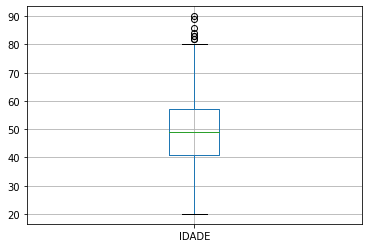

In [ ]:
registroCand.boxplot('IDADE')

In [ ]:
# registroCand.boxplot('VR_BEM_CANDIDATO', figsize=(12, 20))
registroCand[['VR_BEM_CANDIDATO']].describe(include='all')

,VR_BEM_CANDIDATO
count,1.629000e+03
mean,1.134011e+06
std,6.528018e+06
min,0.000000e+00
25%,9.144800e+04
50%,3.025000e+05
75%,7.772163e+05
max,1.782150e+08


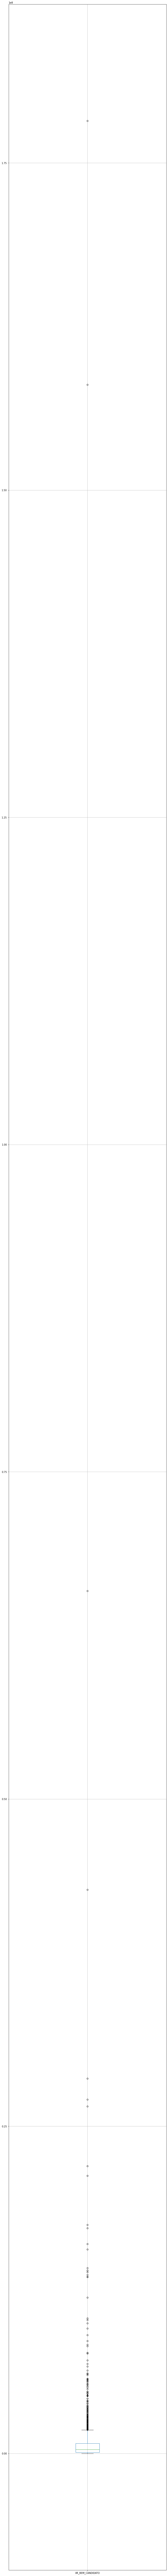

In [ ]:
registroCand.boxplot('VR_BEM_CANDIDATO', figsize=(12, 200))

In [ ]:
registroCand.to_csv('classificador-pefil-voto-candidato/database/registro_candidato.csv')

In [ ]:
votacao_secao = pd.read_csv('classificador-pefil-voto-candidato/database/votacao_secao_2022_MG_compacta.zip', sep=';', compression='zip', usecols=['NM_MUNICIPIO', 'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'DS_CARGO'])
votacao_secao_dEstadual = votacao_secao.query("DS_CARGO == 'DEPUTADO ESTADUAL'", inplace=False)
votacao_secao_dFederal = votacao_secao.query("DS_CARGO == 'DEPUTADO FEDERAL'", inplace=False)
votocao_secao_deputados = pd.concat([votacao_secao_dEstadual, votacao_secao_dFederal])

In [ ]:
voto_cidade = votocao_secao_deputados.groupby(['NM_MUNICIPIO', 'NR_VOTAVEL', 'NM_VOTAVEL', 'DS_CARGO']).sum()
voto_cidade

QT_VOTOS
NM_MUNICIPIO   NR_VOTAVEL NM_VOTAVEL                      DS_CARGO                   
BANDEIRA       10         REPUBLICANOS                    DEPUTADO ESTADUAL       102
                                                          DEPUTADO FEDERAL         32
               11         PROGRESSISTAS                   DEPUTADO ESTADUAL       133
                                                          DEPUTADO FEDERAL         15
               12         Partido Democrático Trabalhista DEPUTADO ESTADUAL        13
...                                                                               ...
ÁGUAS FORMOSAS 77999      FABRICIO PAULA DE ASSUNÇÃO      DEPUTADO ESTADUAL         1
               90090      WILLIAN DE OLIVEIRA BRAGA       DEPUTADO ESTADUAL         5
               90345      ADENILDO SANTOS DA SILVA        DEPUTADO ESTADUAL         1
               90789      VITORNELIO EZEQUIEL DE SOUZA    DEPUTADO ESTADUAL         2
               90998      REINALDO DA SILVA OLIVEIRA      DEPUTADO ESTADUAL         1

[30125 rows x 1 columns]

In [ ]:
voto_cidade = voto_cidade.query("NR_VOTAVEL > 97", inplace=False)
voto_cidade

QT_VOTOS
NM_MUNICIPIO   NR_VOTAVEL NM_VOTAVEL                   DS_CARGO                   
BANDEIRA       1000       ALESSANDRA SILVA RIBEIRO     DEPUTADO FEDERAL          1
               1001       WEVERTON JOSE DA LOMBA ALVES DEPUTADO FEDERAL          3
               1010       GILBERTO APARECIDO ABRAMO    DEPUTADO FEDERAL       2139
               1011       HERCULANO ANGHINETTI         DEPUTADO FEDERAL         10
               1012       ALCIONE MAGELA MAROCOLO      DEPUTADO FEDERAL         20
...                                                                            ...
ÁGUAS FORMOSAS 77999      FABRICIO PAULA DE ASSUNÇÃO   DEPUTADO ESTADUAL         1
               90090      WILLIAN DE OLIVEIRA BRAGA    DEPUTADO ESTADUAL         5
               90345      ADENILDO SANTOS DA SILVA     DEPUTADO ESTADUAL         1
               90789      VITORNELIO EZEQUIEL DE SOUZA DEPUTADO ESTADUAL         2
               90998      REINALDO DA SILVA OLIVEIRA   DEPUTADO ESTADUAL         1

[28093 rows x 1 columns]

In [ ]:
num_estado_civil = registroCand['DS_ESTADO_CIVIL'].value_counts()
num_estado_civil

CASADO(A)                    1344
SOLTEIRO(A)                   754
DIVORCIADO(A)                 337
VIï¿½VO(A)                     55
SEPARADO(A) JUDICIALMENTE      24
Name: DS_ESTADO_CIVIL, dtype: int64